## Análise Imobiliária Petropolitana - Machine Learning

### Informações do conjunto de dados

1 - valor: valor do imóvel

2 - m2: Metros quadrados (m²) do imóvel

3 - quartos: quantidade de quartos do imóvel

4 - vagas: quantidade de vagas de garagem

5 - banheiros: quantidade de banheiros do imóvel

6 - iptu: valor do iptu

7 - data_anuncio: data do anúncio

8 - link: link do anúncio

9 - imagem: identificação da imagem

10 - data: data de extração

11 - cidade: cidade do imóvel anunciado

12 - bairro: bairro do imóvel anunciado

13 - latitude: latitude do bairro

14 - latitude: longitude do bairro

15 - hash_imagem: chave hash para identificação das imagens do anúncio

16 - hash_imagem: chave hash para identificação das strings do anúncio

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Análise exploratória dos dados

#### Conhecendo a base de dados

In [89]:
base = pd.read_csv(r"C:\Users\Ryan\OneDrive\Documentos\GitHub\analise_imobiliaria_petropolitana\imoveis_petropolis_2025-09-27.csv", sep = ";")

In [90]:
base.head(3)  ## Visualizando os primeiros registros da base de dados

,valor,m2,quartos,vagas,banheiros,iptu,condominio,data_anuncio,link,imagem,data,cidade,bairro,latitude,longitude,hash_imagem,hash_str
0,455000,70,2.0,1.0,2.0,332,751,2025-09-26 21:26:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\809548138667735.webp,2025-09-27,Petrópolis,Itaipava,-22.412700,-43.142100,ffde00000040df7f,ffde00000040df7f
1,430000,56,2.0,1.0,1.0,110,210,2025-09-26 11:12:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\119505194936684.webp,2025-09-27,Petrópolis,Corrêas,-22.442565,-43.139706,ffff7f5330202010,ffff7f5330202010
2,150000,62,1.0,NaN,1.0,NaN,NaN,2025-09-25 14:37:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\686564086666094.webp,2025-09-27,Petrópolis,Quissama,-22.492869,-43.159080,800002dee0e0fcfc,800002dee0e0fcfc


In [91]:
base.shape ## a base possui 4861 linhas e 17 colunas ao total

(4861, 17)

In [92]:
base.info()  ## catalogando o tipo dos atributos e verificando a existência de valores vazios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         4861 non-null   int64  
 1   m2            4861 non-null   int64  
 2   quartos       4854 non-null   float64
 3   vagas         3833 non-null   float64
 4   banheiros     4844 non-null   float64
 5   iptu          3316 non-null   object 
 6   condominio    2613 non-null   object 
 7   data_anuncio  4861 non-null   object 
 8   link          4861 non-null   object 
 9   imagem        4854 non-null   object 
 10  data          4861 non-null   object 
 11  cidade        4861 non-null   object 
 12  bairro        4861 non-null   object 
 13  latitude      4835 non-null   float64
 14  longitude     4835 non-null   float64
 15  hash_imagem   4854 non-null   object 
 16  hash_str      4854 non-null   object 
dtypes: float64(5), int64(2), object(10)
memory usage: 645.7+ KB


### Fazendo a conversão de tipo para algumas variáveis

Tratando os valores vazios

In [ ]:
valores_unicos = []
for i in base.columns[0:17]:
   print(i, ':', len(base[i].astype(str).value_counts()))   ## visualizando os valores únicos de cada coluna
   valores_unicos.append(base[i].astype(str).value_counts())

valor : 598
m2 : 640
quartos : 6
vagas : 6
banheiros : 6
iptu : 1056
condominio : 773
data_anuncio : 3605
link : 4854
imagem : 4848
data : 1
cidade : 1
bairro : 43
latitude : 41
longitude : 41
hash_imagem : 4691
hash_str : 4691


In [ ]:
base.describe()  ## visualizando as medidas estatísticas

,valor,m2,quartos,vagas,banheiros,latitude,longitude
count,4.861000e+03,4861.000000,4854.000000,3833.000000,4844.000000,4835.000000,4835.000000
mean,1.487766e+06,649.313310,3.077668,2.460475,2.611478,-22.455852,-43.166038
std,1.813092e+06,6113.298731,1.197886,1.446349,1.397233,0.060547,0.034056
min,2.850000e+02,1.000000,1.000000,1.000000,1.000000,-22.542270,-43.227685
25%,4.900000e+05,76.000000,2.000000,1.000000,1.000000,-22.509981,-43.191274
50%,9.000000e+05,150.000000,3.000000,2.000000,2.000000,-22.442565,-43.168100
75%,1.700000e+06,300.000000,4.000000,4.000000,4.000000,-22.412700,-43.142100
max,2.250000e+07,220000.000000,5.000000,5.000000,5.000000,-22.252300,-43.072539


In [ ]:
base.bairro.value_counts()

bairro
Itaipava                 1011
Centro                    713
Pedro do Rio              379
Corrêas                   372
Araras                    314
Quitandinha               231
Nogueira                  204
Mosela                    123
Retiro                    123
Samambaia                 120
Valparaíso                119
Castelanea                112
Bingen                    111
Independência             100
Coronel Veiga              91
Cuiabá                     79
Alto da Serra              75
São Sebastião              68
Bonsucesso                 64
Fazenda Inglesa            57
Morin                      44
Saldanha Marinho           41
Duarte Silveira            36
Carangola                  36
Quarteirão Ingelheim       32
Posse                      28
Cascatinha                 24
Itamarati                  21
Quissama                   20
Quarteirão Brasileiro      20
Duchas                     17
Vila Militar               17
Simeria                    15
Cax

<Axes: title={'center': 'Qtde de Imóveis x Barro'}, xlabel='bairro'>

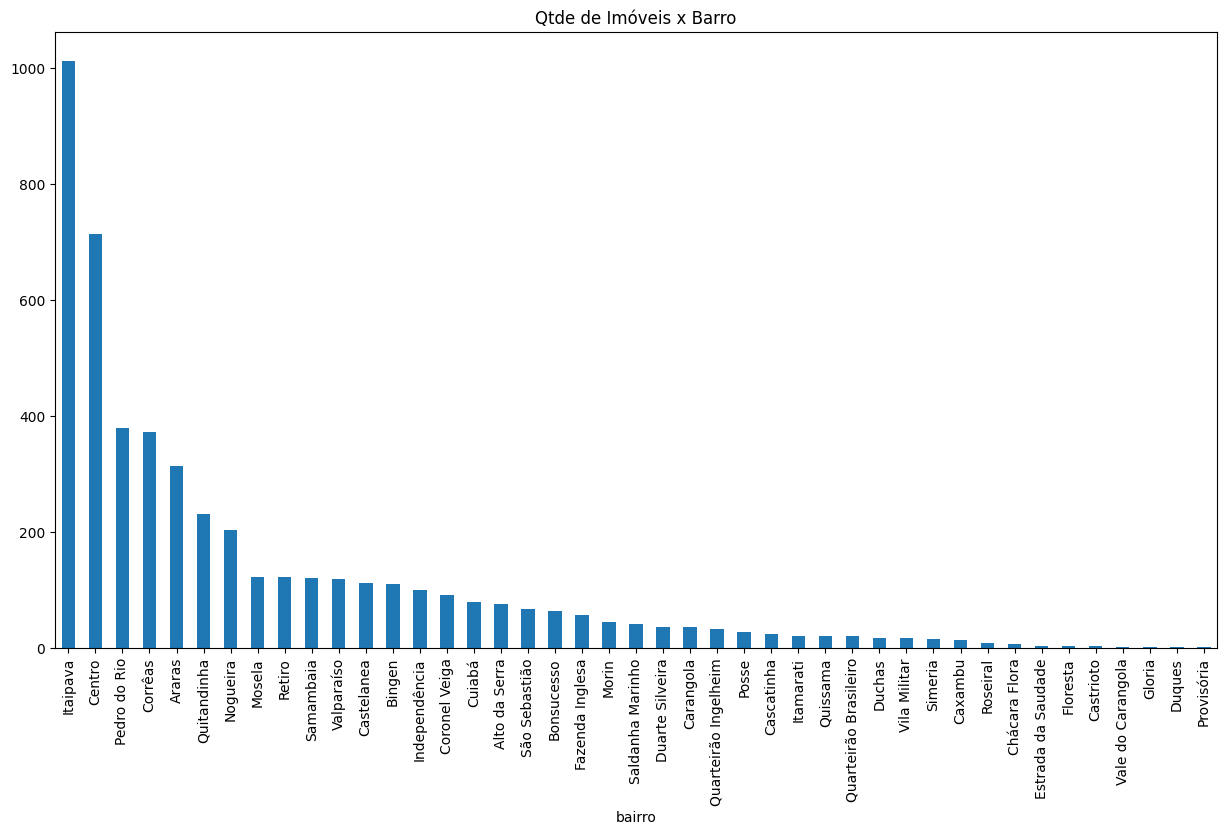

In [ ]:
plt.figure(figsize=(15, 8))
base.bairro.value_counts().plot(kind = 'bar', title = "Qtde de Imóveis x Barro")  ## analisando a quantidade de imóveis por bairro

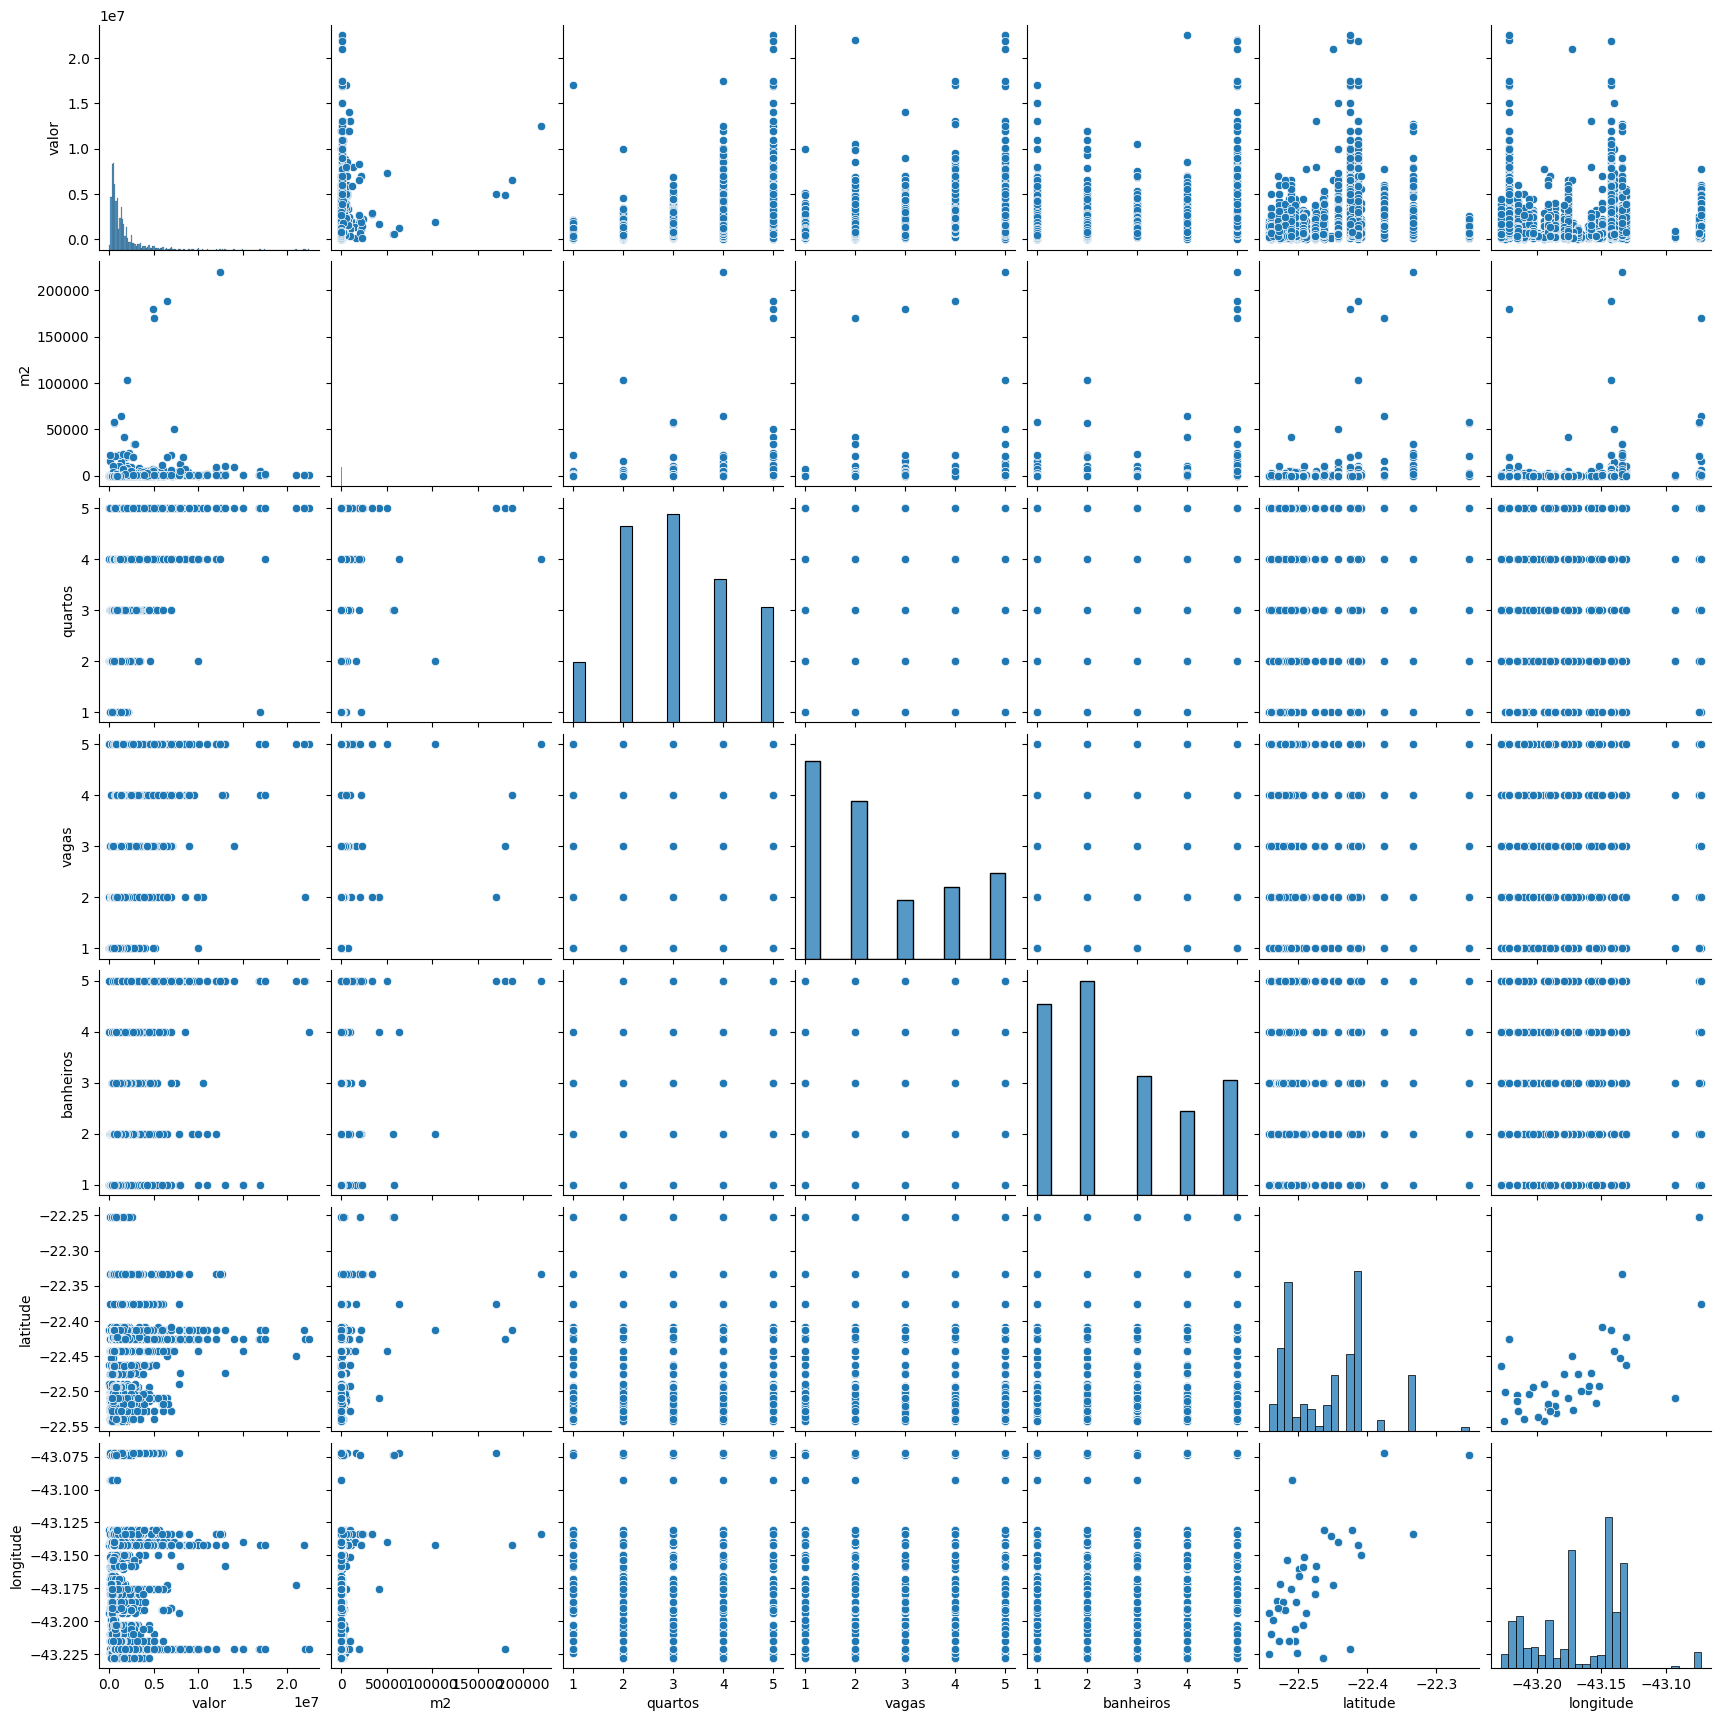

In [ ]:
sns.pairplot(base)